In [1]:
import nmr.methods as nmr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# from pymatgen.analysis.nmr import ChemicalShielding
# import pstats, cProfile

In [6]:
# %timeit -c freq, amp, cpu_time = nmr.CSA_spinning_sideband(number_of_points = 640,start_frequency = -320/2,frequency_bandwidth = 640/2, qunatum_number = 0.5, wo=1., iso = 0, aniso=120., eta = 0.7, Cq=0, eta_e=0, quad_second_order=0, ph_step=64, spin_frequency=10, rotor_angle=np.pi/180. * 54.735, omega_PM=np.asarray([0.0,0,0]), m_final= 0.5, m_initial = -0.5, averaging_scheme=0, averaging_size=12)

freq, amp, cpu_time = nmr.CSA_spinning_sideband(number_of_points = 640, 
                                                spectral_start = -320/2,
                                                spectral_increment = 0.5,
                                                qunatum_number = 0.5, wo=1.,
                                                iso = 0, aniso=120., eta = 0.7,
                                                Cq=0, eta_e=0, quad_second_order=0,
                                                ph_step=64, spin_frequency=10,
                                                rotor_angle=np.pi/180. * 54.735,
                                                omega_PM=np.asarray([0.0,0,0]),
                                                m_final= 0.5, m_initial = -0.5,
                                                averaging_scheme=0,
                                                averaging_size=12)
print(cpu_time, ' s')

0.000363  s


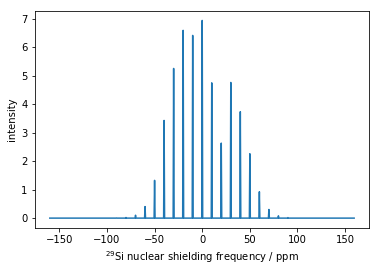

In [8]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

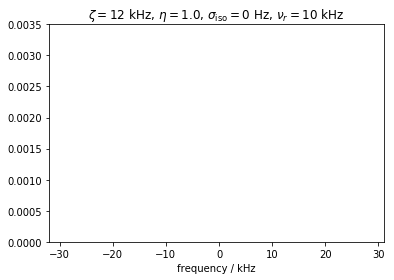

In [127]:
fig, ax = plt.subplots()

ax.set_xlim(( -32, 32-1))
ax.set_ylim((0, 0.0035))

label=ax.text(0.65,0.9,'',
                   verticalalignment='center',
                    horizontalalignment='left',
                    transform=ax.transAxes,fontsize=15)
ax.set_xlabel('frequency / kHz')
ax.set_title(r"$\zeta=12$ kHz, $\eta=1.0$, $\sigma_\mathrm{iso}=0$ Hz, $\nu_r=10$ kHz")
line, = ax.plot([], [], lw=1.2, c='k');

In [128]:
def init():
    line.set_data([], [])
    return (line,)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [134]:
def animate(i):
    
    freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=512,
                        start_frequency=-32.,
                        frequency_bandwidth=64.-1.,
                        iso = 0., aniso=12., eta = .7,
                        ph_step=32, spin_frequency=10.,
                        rotor_angle=np.pi/180.* (0+0.1*i),
                        omega_PM=np.asarray([0.,0.,0.]),
                        averaging_scheme=0,
                        averaging_size=64)
    line.set_data(freq, amp)
    label.set_text("angle = {:.1f}".format(0.1*i)+'$^\circ$')
    return (line,label,)

In [135]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=901, interval=20, blit=False)

In [136]:
anim.save('angle_off.mp4', writer=writer)

In [133]:
HTML(anim.to_html5_video())

In [2]:
freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=512,
                        start_frequency=-256.,
                        frequency_bandwidth=512.-1.,
                        iso = 0., aniso=200., eta = 0.7,
                        ph_step=32, spin_frequency=16.,
                        rotor_angle=np.pi/180.*54.7356,
                        omega_PM=np.asarray([0.,0.,0.]),
                        averaging_scheme=0,
                        averaging_size=32)
print(cpu_time, ' s')

TypeError: CSA_spinning_sideband() takes at least 17 positional arguments (3 given)

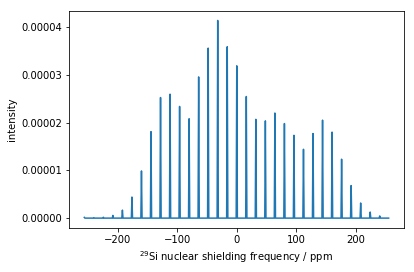

In [16]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

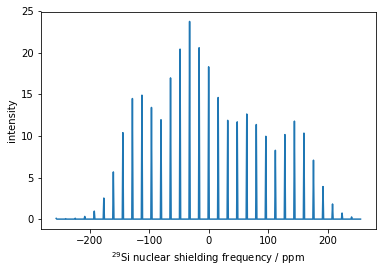

In [4]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [25]:
# %%time
start_frequency = -4050

freq, amp1, cpu_time1 = nmr.CSA_spinning_sideband(
        spectral_start = start_frequency,
        spectral_increment = -2*start_frequency/5120,
        number_of_points = 5120,

        qunatum_number = [0.5],
        wo = 700000,

        # CSA tensor information
        iso = [00.0],
        aniso = [2000.],
        eta = 1.0,

        # quad tensor information
        Cq = 0.0,
        eta_e = 0.0,
        quad_second_order = 0,

        # spin rate, spin angle and number spinning sidebands
        ph_step = 32,
        spin_frequency = 900,
        rotor_angle=(np.pi/180.)*62,

        # Euler angle -> principal to molecular frame
        omega_PM = np.asarray([0.0,0,0]),

        m_final = .5,
        m_initial = -.5,

        # Euler angles for powder averaging scheme
        averaging_scheme=0,
        averaging_size=32)

# freq, amp2, cpu_time1 = nmr.CSA_spinning_sideband(
#         start_frequency = start_frequency,
#         frequency_bandwidth = -2*start_frequency-1,
#         number_of_points = 512,

#         qunatum_number = [1.0],

#         # CSA tensor information
#         iso = [0.0],
#         aniso = [100.],
#         eta = 0.0,

#         # quad tensor information
#         Cq = 0.0,
#         eta_e = .3,
#         quad_second_order = 0,

#         # spin rate, spin angle and number spinning sidebands
#         ph_step = 32,
#         spin_frequency = 900,
#         rotor_angle=(np.pi/180.)*62,

#         # Euler angle -> principal to molecular frame
#         omega_PM = np.asarray([0.0,0,0]),

#         m_final = 1.,
#         m_initial = -1.,

#         # Euler angles for powder averaging scheme
#         averaging_scheme=0,
#         averaging_size=48)

# # freq, amp1, cpu_time1 = nmr.CSA_spinning_sideband(number_of_points=512,
# #                           start_frequency=-5000,
# #                           frequency_bandwidth=10000-1,
# #                           iso = np.asarray([0.]),
# #                           aniso=np.asarray([2000.]),
# #                           eta = np.asarray([1.0]),
# #                           ph_step=32,
# #                           spin_frequency=900.,
# #                           rotor_angle=(np.pi/180.)*62,
# #                           omega_PM=np.asarray([0.0,0,0]),
# #                           averaging_scheme=0,
# #                           averaging_size=64)

print(cpu_time1)

0.001035


In [26]:
amp1.max()

0.015727789113879682

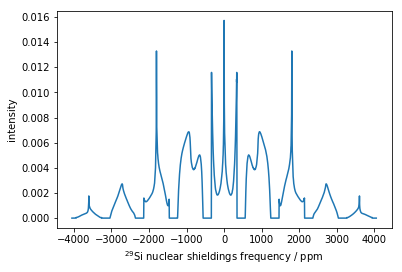

In [28]:
# print(amp1)
# amp1=0
total = amp1
plt.plot(freq, amp1)
# plt.ylim([0., 0.01])
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shieldings frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [43]:
# %timeit nmr.CSA_spinning_sideband(number_of_points=512, start_frequency=-2500, frequency_bandwidth=5000.-1, iso = 0., aniso=2000., eta = 1.0, ph_step=256, spin_frequency=900., rotor_angle=(np.pi/180.)*62., omega_PM=np.asarray([0.0,0,0]), averaging_scheme=0, averaging_size=64)

freq, amp1, cpu_time1 = nmr.CSA_spinning_sideband(number_of_points=512,
                                                  start_frequency=-2560*4,
                                                  frequency_bandwidth=5120*4-1,
                                                  
                                                  qunatum_number = [1.5, 3.5, 1.5, 2.5],
                                                  wo = 700000,
                                                  
                                                  iso = [-4000.0, -2000., 0, 2000],
                                                  aniso=[2000., 2000., 2000, 2000],
                                                  eta = [.7, 0.7, 0.7, 0.7],
                                                  
                                                  # quad tensor information
                                                  Cq = [1000.0, 300, 4000, 120],
                                                  eta_e = [0.0, 0.3, 0.7, 1.0],
                                                  quad_second_order = 1,
                                                  
                                                  ph_step=512,
                                                  spin_frequency=166.667,
                                                  rotor_angle=(np.pi/180.)*54.73,
                                                  omega_PM=np.zeros(12),
                                                  
                                                  m_final = .5,
                                                  m_initial = -.5,
                                                  
                                                  averaging_scheme=0,
                                                  averaging_size=14)

print(cpu_time1, ' s')

0.008025  s


44.6 ms ± 582 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

47.9 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

134 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [44]:
print(amp1)

[0.00000000e+00 0.00000000e+00 3.29711737e-23 ... 9.51787556e-04
 0.00000000e+00 0.00000000e+00]


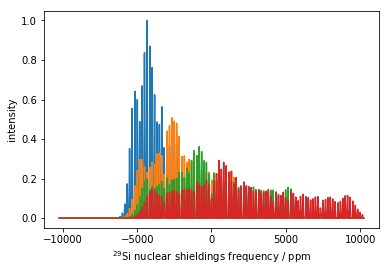

In [45]:
plt.plot(freq, amp1.reshape(4, int(amp1.size/4)).T/amp1.max())
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shieldings frequency / ppm')
plt.ylabel('intensity')
plt.show()

34.8 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

35.9 ms ± 765 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [2]:
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook

# from interaction.ns import static
from IPython.display import display
from ipywidgets.widgets import interact, FloatSlider, IntSlider

output_notebook()


number_of_points = 256*8
spectral_start = -128.
spectral_increment = 256/number_of_points

iso = 0.
aniso = 2.
eta = 0.7

freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=number_of_points,
                        spectral_start=spectral_start,
                        spectral_increment=spectral_increment,
                        
                        qunatum_number = [1.5],
                        wo = 52.921e3,
    
                        iso = iso, aniso=4, eta = 0,
    
                        Cq = [0.0],
                        eta_e = [0.0],
                        quad_second_order = 1,
    
                        ph_step=32,
                        spin_frequency=15,
                        rotor_angle=(np.pi/180.)*54.732,
                        omega_PM=np.asarray([0.0,.0,0.0]),
    
                        m_final = .5,
                        m_initial = -.5,
    
                        averaging_scheme=0,
                        averaging_size=32)

plot = figure(plot_height=600, plot_width=800, \
              title="Nuclear Shielding static lineshape",
              tools="box_zoom,reset,save",
              x_range=[freq[0], freq[-1]])

line = plot.line(freq, amp, line_width=2., line_alpha=1)

def simpleLineshapeGenerator(rotor_angle, spin_frequency, N_sidebands, iso,
                             aniso, eta_n, eta_e, Cq, averaging_size):
    freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=number_of_points,
                        spectral_start=spectral_start,
                        spectral_increment=spectral_increment,
        
                        qunatum_number = [1.5],
                        wo = 52.921e3,
        
                        iso = [iso], aniso=[aniso], eta = [eta_n],
                        
                        Cq = [Cq],
                        eta_e = [eta_e],
                        quad_second_order = 1,
        
                        ph_step=N_sidebands,
                        spin_frequency=spin_frequency,
                        rotor_angle=(np.pi/180.)*rotor_angle,
                        omega_PM=np.asarray([0.0,.0,0.0]),
        
                        m_final = .5,
                        m_initial = -.5,
        
                        averaging_scheme=0,
                        averaging_size=averaging_size)
    
    line.data_source.data['y'] = amp.reshape(1, int(amp.size/1)).sum(axis=0)
    push_notebook()

show(plot, notebook_handle=True)
interact(simpleLineshapeGenerator, rotor_angle=FloatSlider(min=0.,max=90,step=1,value=54.7356), \
         spin_frequency=FloatSlider(min=0.01, max=100,step=.02,value=15), \
         N_sidebands=IntSlider(min=16, max=1024*16,step=2,value=32),
         iso =FloatSlider(min=-1000, max=1000,step=1,value=0),
         aniso =FloatSlider(min=-150, max=150,step=1,value=2),
         eta_n =FloatSlider(min=0, max=1,step=0.01,value=0.3),
         eta_e =FloatSlider(min=0, max=1,step=0.01,value=0.3),
         Cq =FloatSlider(min=0, max=10000,step=10,value=100),
         averaging_size=IntSlider(min=2, max=256,step=2,value=16));

Loading BokehJS ...

interactive(children=(FloatSlider(value=54.7356, description='rotor_angle', max=90.0, step=1.0), FloatSlider(v…

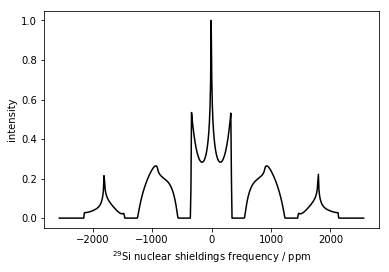

In [3]:
plt.plot(freq, amp1/amp1.max(), 'k')
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shieldings frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [28]:
freq, amp1, cpu_time1 = nmr.CSA_static_lineshape(np.asarray([0., 80., 1]),
                        number_of_points = 256,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2-1,
                        octa=1,
                        nt = 48)
freq, amp2, cpu_time2 = nmr.CSA_static_lineshape(np.asarray([0., 80., 1.]),
                        number_of_points = 256,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2-1,
                        octa=0,
                        nt = 48)

print(cpu_time1, ' s')
print(cpu_time2, ' s')

0.000306  s
0.000356  s


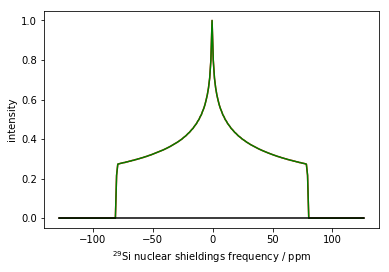

In [29]:
plt.plot(freq, amp1/amp1.max(), 'r')
plt.plot(freq, amp2/amp2.max(), 'g')
plt.plot(freq, amp1/amp1.max() - amp2/amp2.max(), 'k')
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shieldings frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [ ]:
# %timeit nmr.CSA_spinning_sideband(number_of_points=512,start_frequency=-2500,frequency_bandwidth=5000-1,iso = 0, aniso=2000., eta = 1.0, ph_step=128, spin_frequency=900., rotor_angle=(np.pi/180.)*62, omega_PM=np.asarray([0.0,0,0]), averaging_scheme=0, averaging_size=48)


freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=5120,
                        start_frequency=-2560,
                        frequency_bandwidth=5120-1,
                        iso = 0., aniso=2000., eta = 0.0,
                        ph_step=32, spin_frequency=2,
                        rotor_angle=(np.pi/180.)*62,
                        omega_PM=np.asarray([0.0,.0,0.0]),
                        averaging_scheme=0,
                        averaging_size=32)
print(cpu_time, ' s')

In [ ]:
%matplotlib inline
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

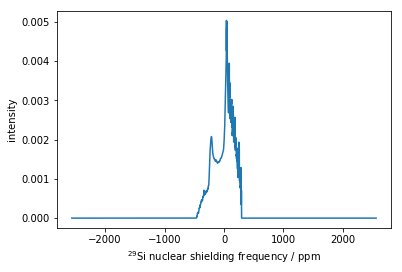

In [8]:
%matplotlib inline
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [137]:
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook

# from interaction.ns import static
from IPython.display import display
from ipywidgets.widgets import interact, FloatSlider, IntSlider

output_notebook()


number_of_points =5120
start_frequency = -2560.
frequency_bandwidth = 5120-1.

iso = 0.
aniso = 2000.
eta = 1.0

freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=number_of_points,
                        start_frequency=start_frequency,
                        frequency_bandwidth=frequency_bandwidth,
                        iso = iso, aniso=aniso, eta = eta,
                        ph_step=32,
                        spin_frequency=900,
                        rotor_angle=(np.pi/180.)*54.732,
                        omega_PM=np.asarray([0.0,.0,0.0]),
                        averaging_scheme=0,
                        averaging_size=64)

plot = figure(plot_height=300, plot_width=400, \
              title="Nuclear Shielding static lineshape",
              tools="box_zoom,reset,save",
              x_range=[freq[0], freq[-1]])

line = plot.line(freq, amp, line_width=1.5, line_alpha=0.6)

def simpleLineshapeGenerator(rotor_angle, spin_frequency, N_sidebands):
    freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=number_of_points,
                        start_frequency=start_frequency,
                        frequency_bandwidth=frequency_bandwidth,
                        iso = iso, aniso=aniso, eta = eta,
                        ph_step=N_sidebands,
                        spin_frequency=spin_frequency,
                        rotor_angle=(np.pi/180.)*rotor_angle,
                        omega_PM=np.asarray([0.0,.0,0.0]),
                        averaging_scheme=0,
                        averaging_size=64)
    
    line.data_source.data['y'] = amp
    push_notebook()

show(plot, notebook_handle=True)
interact(simpleLineshapeGenerator, rotor_angle=FloatSlider(min=0.,max=90,step=1,value=54.732), \
         spin_frequency=FloatSlider(min=1., max=5000.,step=0.5,value=900), \
         N_sidebands=IntSlider(min=16, max=1024*16,step=2,value=32));

Loading BokehJS ...

interactive(children=(FloatSlider(value=54.732, description='rotor_angle', max=90.0, step=1.0), FloatSlider(va…

In [2]:
cProfile.runctx("nmr.CSA_spinning_sideband(number_of_points=512,start_frequency=-2500,frequency_bandwidth=5000-1,iso = 0, aniso=2000., eta = 1.0, ph_step=128, spin_frequency=900., rotor_angle=(np.pi/180.)*62, omega_PM=np.asarray([0.0,0,0]), averaging_scheme=0, averaging_size=48)", globals(), locals(), "Profile.prof")

s = pstats.Stats("Profile.prof")
s.strip_dirs().sort_stats("time").print_stats()

Mon Apr  8 09:33:37 2019    Profile.prof

         6 function calls in 0.048 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.048    0.048    0.048    0.048 {nmr.methods.CSA_spinning_sideband}
        1    0.000    0.000    0.048    0.048 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.array}
        1    0.000    0.000    0.048    0.048 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 numeric.py:469(asarray)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [15]:
# %timeit nmr.CSA_spinning_sideband(number_of_points=512,start_frequency=-2500,frequency_bandwidth=5000-1,iso = 0, aniso=2000., eta = 1.0, ph_step=128, spin_frequency=900., rotor_angle=(np.pi/180.)*62, omega_PM=np.asarray([0.0,0,0]), averaging_scheme=0, averaging_size=48)


freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=5120.,
                        spectral_start=-2560.,
                        spectral_increment=1.,
                        quantum_number=0.5,
                        wo=1,
                        iso = 0., aniso=2000., eta = 1.0,
                        Cq=0, eta_e=0,
                        ph_step=128, spin_frequency=900.,
                        rotor_angle=(np.pi/180.)*62.7356,
                        omega_PM=np.asarray([0.0,.0,0.0]),
                        m_final=0.5,
                        m_initial=-0.5,
                        averaging_scheme=0,
                        averaging_size=26)
print(cpu_time, ' s')

TypeError: CSA_spinning_sideband() takes at least 16 positional arguments (3 given)

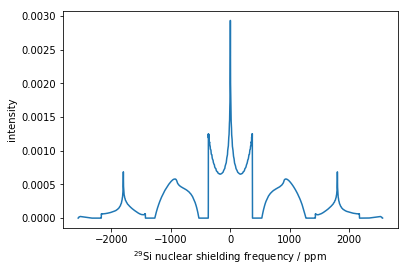

In [4]:
%matplotlib inline
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [5]:
# %timeit nmr.CSA_spinning_sideband(number_of_points=512,start_frequency=-2500,frequency_bandwidth=5000,iso = 0, aniso=2000., eta = 1.0, ph_step=512, spin_frequency=900, rotor_angle=(np.pi/180.)*62, omega_PM=np.asarray([0.0,0,0]), averaging_scheme=0, averaging_size=48)


freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=510,
                        start_frequency=-2560,
                        frequency_bandwidth=5120-1,
                        iso = 0., aniso=2000., eta = 1.0,
                        ph_step=64, spin_frequency=900.,
                        rotor_angle=(np.pi/180.)*62,
                        omega_PM=np.asarray([0.0,0,0]),
                        averaging_scheme=0,
                        averaging_size=48)
print(cpu_time, ' s')

0.024588  s


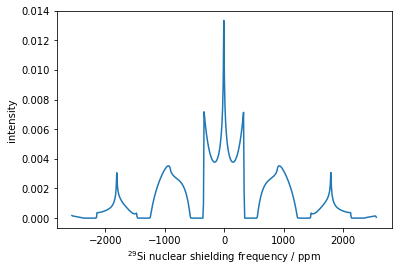

In [6]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [7]:
# %timeit nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]), number_of_points = 512, start_frequency=-256/2, frequency_bandwidth=512/2, octa=0, nt = 128)

freq, amp1, cpu_time1 = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
                        number_of_points = 256,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2-1,
                        octa=0,
                        nt = 16)
# freq, amp2, cpu_time2 = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
#                         number_of_points = 128,
#                         start_frequency=-256/2,
#                         frequency_bandwidth=512/2,
#                         octa=0,
#                         nt = 64)

print(cpu_time1, ' s')
# print(cpu_time2, ' s')

6.599999999999999e-05  s


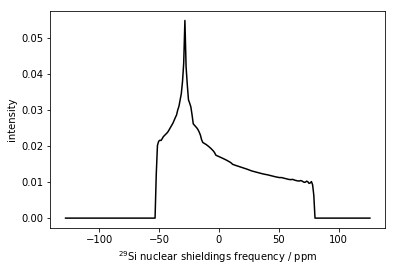

In [8]:
plt.plot(freq, amp1, 'k')
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shieldings frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [9]:
# %timeit nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]), number_of_points = 512, start_frequency=-256/2, frequency_bandwidth=512/2, octa=0, nt = 128)

freq, amp1, cpu_time1 = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
                        number_of_points = 512,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2-1,
                        octa=0,
                        nt = 128)
# freq, amp2, cpu_time2 = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
#                         number_of_points = 128,
#                         start_frequency=-256/2,
#                         frequency_bandwidth=512/2,
#                         octa=0,
#                         nt = 64)

print(cpu_time1, ' s')
# print(cpu_time2, ' s')

0.003332  s


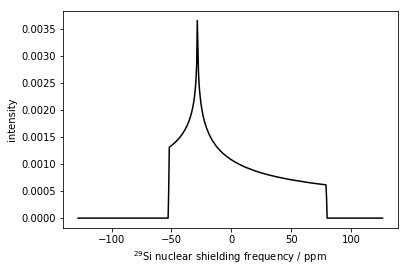

In [10]:
plt.plot(freq, amp1, 'k')
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [11]:
freq, amp1, cpu_time1 = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
                        number_of_points = 512,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2,
                        octa=0,
                        nt = 16)
# freq, amp2, cpu_time2 = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
#                         number_of_points = 128,
#                         start_frequency=-256/2,
#                         frequency_bandwidth=512/2,
#                         octa=0,
#                         nt = 64)

print(cpu_time1, ' s')

8.2e-05  s


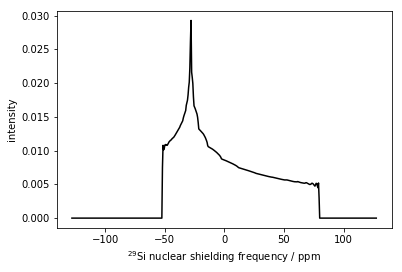

In [12]:
plt.plot(freq, amp1, 'k')
# plt.plot(freq, amp2, 'r')
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [10]:
%timeit nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]), number_of_points = 512, start_frequency=-256/2, frequency_bandwidth=512/2, octa=0, nt = 128)

freq, amp, cpu_time = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
                        number_of_points = 512,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2,
                        octa = 1,
                        nt = 128)

print(cpu_time, ' s')

1.73 ms ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
0.000736  s


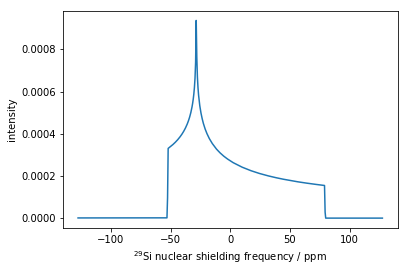

In [11]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [8]:
%timeit nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]), number_of_points = 512, start_frequency=-256/2, frequency_bandwidth=512/2, nt = 64)

freq, amp, cpu_time = nmr.CSA_static_lineshape(np.asarray([0., 80., 0.3]),
                        number_of_points = 512,
                        start_frequency=-256/2,
                        frequency_bandwidth=512/2,
                        nt = 64)

print(cpu_time, ' s')

820 µs ± 9.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
0.000773  s


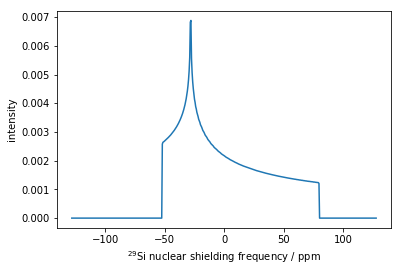

In [9]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [2]:
print(nmr.CSA_static_lineshape.__doc__)


    The method computes a static chemical shielding anisotropy (CSA) NMR
    lineshape spectrum by applying the powder averaging scheme to the CSA
    tensor in the principal axis system (PAS). Note, the CSA tensor is diagonal
    in the PAS with three principal components. The following code uses the
    Haeberlen convention for the principal components.

    The amplitude of the spectrum is evaluated at frequencies which are given by
    ``freq = np.arange(number_of_points)/number_of_points * frequency_bandwidth + start_frequency``

    The code implements the powder averaging scheme by
    Alderman, Solum and Grant, J. Chem. Phys, 84, 1985. DOI: 10.1063/1.450211
    
    :attr:haeberlen_values: namedtuple: A namedTuple HaeberlenNotation from
                                        pymatgen.analysis.nmr
    :attr:number_of_points: int: The number of points in the frequency dimension.
    :attr:start_frequency: float:The starting frequency.
    :attr:frequency_bandwidth float: The sp

The following $^{29}$Si nuclear shielding tensor is taken from the Gaussian output. The tensor corresponds to a Si atom in the highly siliceous zeolite Sigma-2.

In [3]:
Si29_tensor = [[443.2366, -10.9178, 0.0133  ],
               [9.7144  , 435.4115, 0.0330  ],
               [0.1192  , 0.6163  , 433.3699]]

The ``ChemicalShielding`` class from `pymatgen.analysis.nmr` finds the three components of this tensor in the principal axis system. 

****
**Note**

Only the symmetric part of the shielding or chemical shift tensor contributes to the observable NMR frequency. Calculate the symmetric part of the `Si29_tensor` before passing it as an argument of the ``ChemicalShielding``.

---

In [4]:
Si29_tensor = np.asarray(Si29_tensor)
Si29_tensor = (Si29_tensor+Si29_tensor.T)/2
# tensor = ChemicalShielding(Si29_tensor)

where the variable `tensor` is the symmetric part of the shielding tensor. Simulate the NMR shielding/chemical shift line shape spectrum using

In [10]:
# %timeit nmr.CSA_spinning_sideband(number_of_points=512,start_frequency=-250/2,frequency_bandwidth=500/2,iso = 0, aniso=80., eta = 0.3,ph_step=512, spin_frequency=10,rotor_angle=np.arctan(np.sqrt(2)),omega_PM=np.asarray([0.0,0,0]),averaging_scheme=2, averaging_size=131)


freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=512,
                        start_frequency=-250/2.,
                        frequency_bandwidth=500./2,
                        iso = 0., aniso=80., eta = 0.3,
                        ph_step=512, spin_frequency=10.,
                        rotor_angle=np.pi/180. * 54.74,
                        omega_PM=np.asarray([2.,1.,0.]),
                        averaging_scheme=2,
                        averaging_size=32)
print(cpu_time, ' s')

# freq, amp, cpu_time = nmr.CSA_spinning_sideband(
#                         number_of_points=number_of_points,
#                         start_frequency=start_frequency,
#                         frequency_bandwidth=frequency_bandwidth,
#                         iso = iso, aniso=aniso, eta = eta,
#                         ph_step=N_sidebands,
#                         spin_frequency=spin_frequency,
#                         rotor_angle=(np.pi/180.)*rotor_angle,
#                         omega_PM=np.asarray([0.0,.0,0.0]),
#                         averaging_scheme=0,
#                         averaging_size=64)

0.00845  s


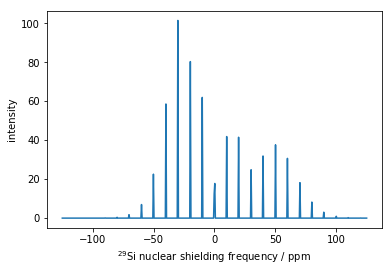

In [11]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

In [65]:
# %timeit nmr.CSA_spinning_sideband(number_of_points=512,start_frequency=-250/2,frequency_bandwidth=500/2,iso = 0, aniso=80., eta = 0.3,ph_step=512, spin_frequency=10,rotor_angle=np.arctan(np.sqrt(2)),omega_PM=np.asarray([0.0,0,0]),averaging_scheme=2, averaging_size=95)


freq, amp, cpu_time = nmr.CSA_spinning_sideband(
                        number_of_points=512,
                        start_frequency=-256./2.0,
                        frequency_bandwidth=512./2. - 1.,
                        iso = 0., aniso=80., eta = 0.7,
                        ph_step=512, spin_frequency=6.6666666667,
                        rotor_angle=np.arctan(np.sqrt(2.)),
                        omega_PM=np.asarray([0.0,0,0]),
                        averaging_scheme=0,
                        averaging_size=35)
print(cpu_time, ' s')

0.101979  s


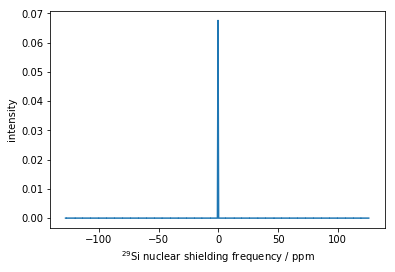

In [66]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()

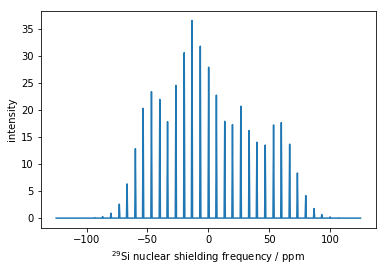

In [8]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()